In [20]:
from __future__ import annotations

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import chi2

# Data Acquisition

- Dataset: **Heart Disease UCI Dataset**
- Source: https://archive.ics.uci.edu/static/public/45/data.csv


## Data Description

Only 14 attributes used:

1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

Complete attribute documentation:

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
   - Value 1: typical angina
   - Value 2: atypical angina
   - Value 3: non-anginal pain
   - Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
   - Value 0: normal
   - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: fla
    - Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease (angiographic disease status) - Value 0: < 50% diameter narrowing - Value 1: > 50% diameter narrowing
    (in any major vessel: attributes 59 through 68 are vessels)


In [21]:
heart_disease_df = pd.read_csv("https://archive.ics.uci.edu/static/public/45/data.csv")

In [22]:
# Column num is the target column. But it has multiple values. 0, 1, 2, 3, 4.
heart_disease_df["num"].value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [23]:
# We have to convert this into a binary classification problem.
# 0 means no heart disease, and 1, 2, 3, 4 means presence of heart disease.

heart_disease_df["target"] = (heart_disease_df["num"] != 0).astype("int8")
heart_disease_df["target"].value_counts()

target
0    164
1    139
Name: count, dtype: int64

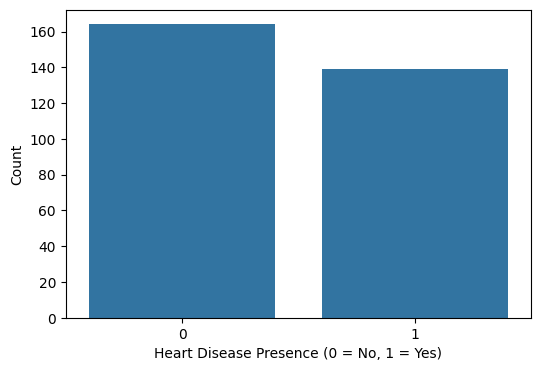

In [24]:
# Plot a countplot of the target column
_ = plt.figure(figsize=(6, 4), dpi=100)
sns.countplot(x="target", data=heart_disease_df)

plt.xlabel("Heart Disease Presence (0 = No, 1 = Yes)")
plt.ylabel("Count")

plt.savefig("../doc/images/heart_disease_target_distribution.png")
plt.show()

In [25]:
heart_disease_df = heart_disease_df.drop(columns=["num"])

In [26]:
heart_disease_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [27]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int8   
dtypes: float64(3), int64(10), int8(1)
memory usage: 31.2 KB


In [28]:
# Only two columns have missing values: ca and thal
# From the data description, we know that these are categorical columns.
# So we will impute the missing values with the mode of the respective columns.

heart_disease_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [29]:
# Required categorical column list to analyze the data distribution and to encode using one hot encoding later
categorical_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
# Required non-categorical column list to analyze the data distribution and to scale later
non_categorical_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]

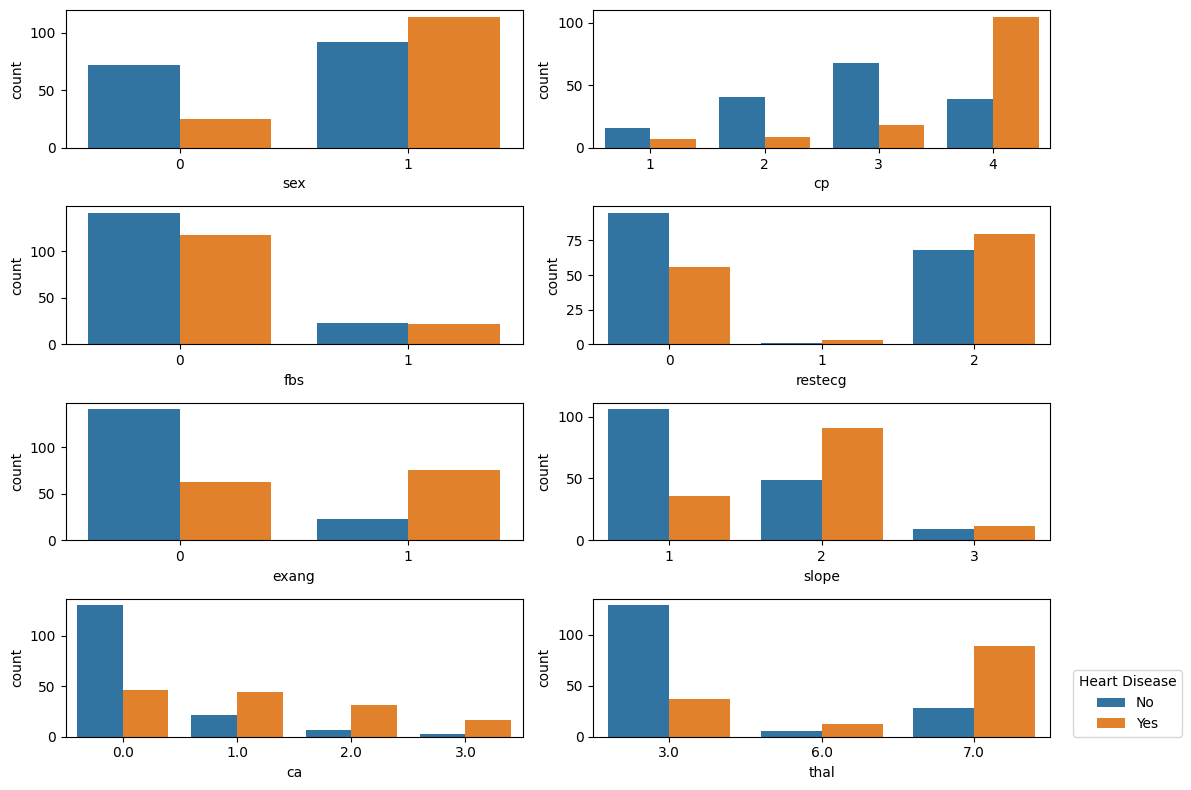

In [30]:
# Create categorical distribution plots for categorical columns

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8), dpi=100)
for axis, column in zip(axes.reshape(-1), categorical_columns, strict=False):
    sns.countplot(
        data=heart_disease_df,
        x=column,
        ax=axis,
        hue="target",
        legend=False,
    )

plt.legend(title="Heart Disease", labels=["No", "Yes"], loc=(1.05, 0))
plt.tight_layout()

plt.savefig("../doc/images/heart_disease_categorical_distribution.png")
plt.show()

In [31]:
# From the plots, we can see that there are not much of a class imbalance towards the target variable.
# There are some columns where a single category within the class is dominating.
# We will keep this in mind will perform some techniques  later to handle this if required.

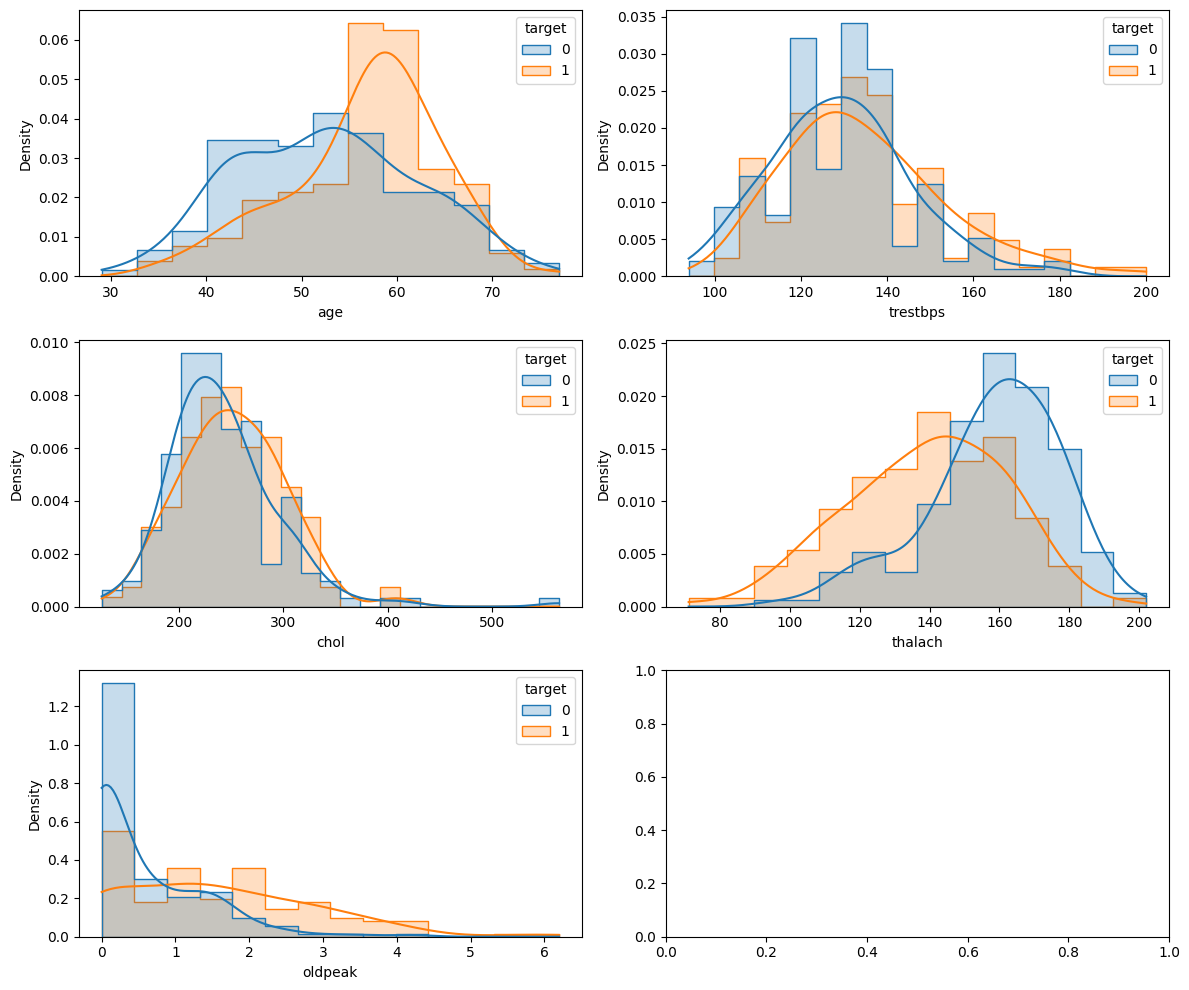

In [32]:
# Create non categorical distribution plots for non-categorical columns

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10), dpi=100)
for axis, column in zip(axes.reshape(-1), non_categorical_columns, strict=False):
    sns.histplot(
        data=heart_disease_df,
        x=column,
        ax=axis,
        hue="target",
        kde=True,
        element="step",
        stat="density",
        common_norm=False,
        legend=True,
    )

plt.tight_layout()
plt.savefig("../doc/images/heart_disease_numerical_distribution.png")
plt.show()

In [33]:
# Except for oldpeak all other non-categorical columns seem to have a normal distribution.
# We will use StandardScaler to scale these columns later.
# For oldpeak we will use MinMaxScaler later.

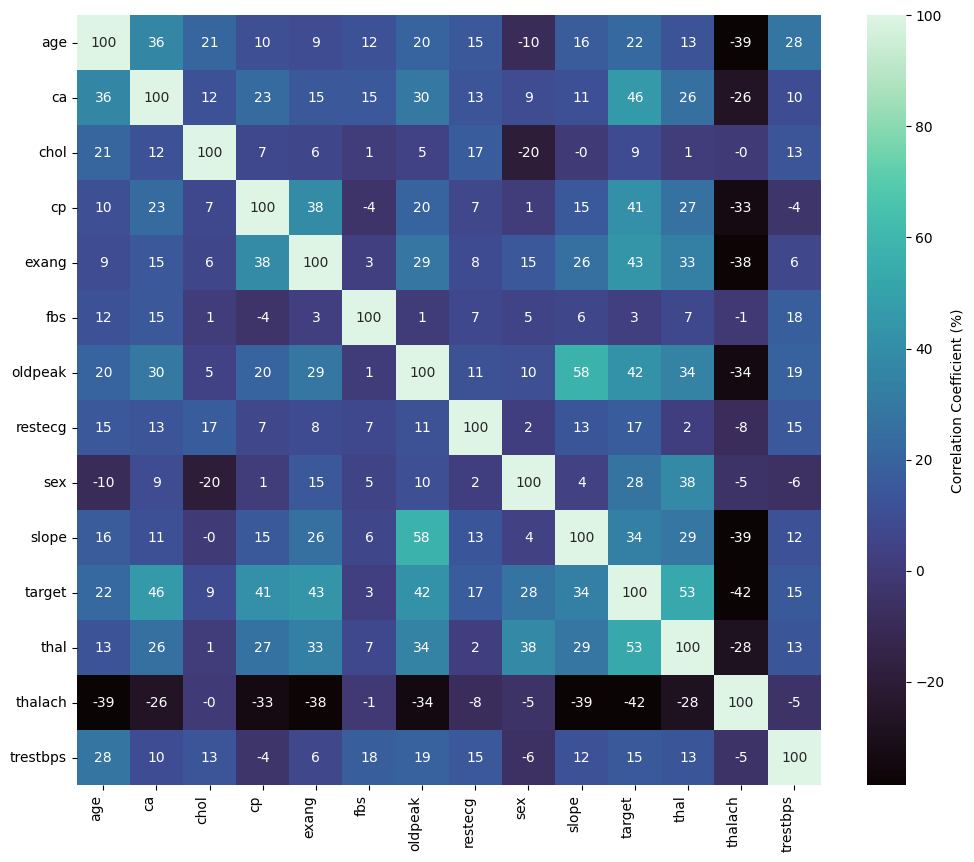

In [34]:
# Sort the columns alphabetically and then create the correlation matrix
correlation_matrix = heart_disease_df.sort_index(axis=1).corr() * 100

fig = plt.figure(figsize=(12, 10), dpi=100)

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".0f",
    cmap="mako",
    robust=True,
    cbar_kws={"label": "Correlation Coefficient (%)"},
)

# Rotate the x labels for better visibility
plt.xticks(rotation=90, ha="right")
# Rotate the y labels for better visibility
plt.yticks(rotation=0)

plt.savefig("../doc/images/heart_disease_correlation_matrix.png")
plt.show()

In [35]:
# No feature has a very high correlation with each other. So we will keep all the features for model training.

In [36]:
chi2_scores, p_values = chi2(heart_disease_df.dropna()[categorical_columns], heart_disease_df.dropna()["target"])

chi2_test = (
    pd.DataFrame(
        data={
            "feature": categorical_columns,
            "chi_score": chi2_scores,
            "p_value": p_values,
        }
    )
    .sort_values(by="p_value", ascending=True)
    .reset_index(drop=True)
)

chi2_test["p < 0.05"] = chi2_test["p_value"] < 0.05  # noqa: PLR2004

chi2_test

,feature,chi_score,p_value,p < 0.05
0,ca,82.730613,9.403357e-20,True
1,thal,65.221093,6.694909e-16,True
2,exang,35.508090,2.539935e-09,True
3,cp,14.591587,1.335092e-04,True
4,restecg,8.134652,4.342718e-03,True
5,slope,7.828836,5.141921e-03,True
6,sex,7.444195,6.364137e-03,True
7,fbs,0.002547,9.597471e-01,False


In [37]:
# From the chi2 test we can see that all categorical features have a p-value less than 0.05.
# except for fbs
# For fbs the p value is as high as 0.95 meaning it is not statistically significant.
# Still we will keep it for model training as it might have some predictive power when combined with other features.
# We will perform feature selection later to see if it can be dropped.